In [2]:
# Import csv dataset.
import pandas as pd
import csv as csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Import the datasets
study_df = pd.read_csv(r"C:\Users\mitch\Desktop\Analytical BootCamp\HOMEWORK\HW5 - Matplotlib\Study_results.csv")
study_df.head()
meta_df = pd.read_csv(r"C:\Users\mitch\Desktop\Analytical BootCamp\HOMEWORK\HW5 - Matplotlib\Mouse_metadata.csv")
meta_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#1 Clean the data by removing duplicate timepoints.
clean_study0 = study_df[['Mouse ID','Timepoint']]
print(len(clean_study0))
clean_study1 = clean_study0.drop_duplicates()
print(len(clean_study1))

merge_study_df0 = pd.merge(clean_study1 , study_df, on= ['Mouse ID','Timepoint'], how='left', indicator='indicator')
print(len(merge_study_df0))
merge_study_df0.head()
merge_study_df = pd.merge(merge_study_df0 , meta_df, on= 'Mouse ID', how='left')
print(len(merge_study_df))
merge_study_df.head()

# Find the unique drug types
drug_types = merge_study_df['Drug Regimen'].unique()
drug_types



1893
1888
1893
1893


array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [4]:
#2 Create summary tables for each drug type.
for i in drug_types:
    stats = merge_study_df.loc[(merge_study_df["Drug Regimen"] == f"{i}")]
    print(f"These are summary statistics for the drug {i}")
    print(stats.describe())

# Count the number of mice in each drug type
merge_study_grpcount = merge_study_df.groupby('Drug Regimen')['Mouse ID'].count()
merge_study_grpcount



These are summary statistics for the drug Infubinol
        Timepoint  Tumor Volume (mm3)  Metastatic Sites  Unnamed: 4  \
count  178.000000          178.000000        178.000000         0.0   
mean    18.174157           52.884795          0.960674         NaN   
std     13.473473            6.567243          1.027104         NaN   
min      0.000000           36.321346          0.000000         NaN   
25%      5.000000           47.312353          0.000000         NaN   
50%     15.000000           51.820584          1.000000         NaN   
75%     30.000000           57.314444          2.000000         NaN   
max     45.000000           72.226731          4.000000         NaN   

       Age_months  Weight (g)  
count  178.000000  178.000000  
mean    16.230337   27.196629  
std      7.510278    2.183810  
min      1.000000   23.000000  
25%      8.000000   25.000000  
50%     20.000000   27.000000  
75%     23.000000   29.000000  
max     24.000000   30.000000  
These are summary st

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Gender
Female    935
Male      958
Name: Mouse ID, dtype: int64

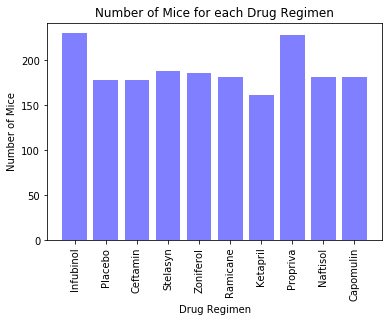

In [5]:
#3 Create a bar chart with Matplotlib's pyplot.
x_axis = np.arange(len(drug_types))
tick_locations = [value+0.4 for value in x_axis]
tick_locations
plt.bar(x_axis, merge_study_grpcount, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, drug_types, rotation="vertical")
plt.title("Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# Prepare data for pie plot.
merge_study_df2 = pd.merge(merge_study_df, merge_study_grpcount, on='Drug Regimen', how='left')
merge_study_df3 = merge_study_df2.rename(columns= {'Mouse ID_y' : 'Mouse Count' , 'Mouse ID_x' : 'Mouse ID' ,'Sex' : 'Gender'})
merge_study_df3

# Find the unique genders
genders = merge_study_df3['Gender'].unique()
genders

# Count the number of mice of each gender
merge_study_grpcount2 = merge_study_df3.groupby('Gender')['Mouse ID'].count()
merge_study_grpcount2



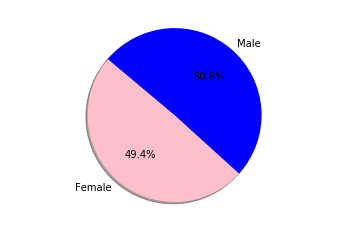

In [6]:
# 4 Tell matplotlib to create a pie chart based upon the above data
colors = ["pink","blue"]
plt.axis("equal")
plt.pie(merge_study_grpcount2, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



In [7]:
# 5 Select a mouse, which I did randomly to plot one Mouse’s tumor growth on Capomulin Regimen Over time 
study_capom0 = merge_study_df3.loc[(merge_study_df3["Drug Regimen"] == "Capomulin")]
unique_mice = study_capom0["Mouse ID"].unique()
unique_mice
len_mice = len(unique_mice)
import random as rd
pick = rd.randrange(0,len_mice)
theone = unique_mice[pick]
theone

study_capom = study_capom0.loc[(study_capom0["Mouse ID"] == f"{theone}")]
timept = study_capom['Timepoint']
volume = study_capom['Tumor Volume (mm3)']



Text(0, 0.5, 'Tumor Volume (mm3)')

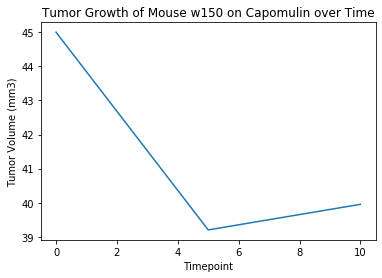

In [8]:
# 6 Create a line plot with the randomly selected mouse to plot one Mouse’s tumor growth on Capomulin Regimen over time
plt.plot(timept, volume)
plt.title(f"Tumor Growth of Mouse {theone} on Capomulin over Time")
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')


In [14]:
# 7 Calculate the average tumor size for each mouse.
merge_study_grpmean = merge_study_df3.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merge_study_grpmean
merge_study_df4 = pd.merge(merge_study_df3, merge_study_grpmean, on='Mouse ID', how='left')
merge_study_df5 = merge_study_df4.rename(columns= {'Tumor Volume (mm3)_y' : 'Average Tumor Volume' , 'Tumor Volume (mm3)_x' : 'Tumor Volume'})
merge_study_df5
merge_study_df6 = merge_study_df5[['Mouse ID','Weight (g)','Average Tumor Volume']]
merge_study_df7 = merge_study_df6.drop_duplicates()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

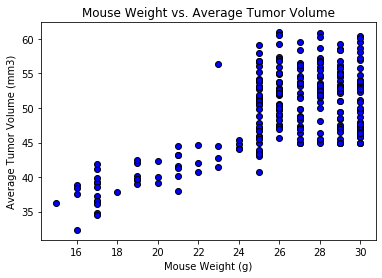

In [15]:


# 7 Generate scatter plot for average tumor size vs. weight for each mouse.
weight = merge_study_df7['Weight (g)']
tumor_size = merge_study_df7['Average Tumor Volume']

plt.scatter(weight , tumor_size, marker="o", facecolors="blue", edgecolors="black")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")





In [16]:
# THIS WORKED AT FIRST, BUT STOPPED WORKING FOR NO APPARENT REASON.

# 7 Calculate the linear regression line on mouse weight vs tumor size.
tv_slope, tv_int, tv_r, tv_p, tv_std_err = stats.linregress(weight, tumor_size)
tv_slope

# Create equation of line to calculate predicted tumor size
tv_fit = tv_slope * weight + tv_int


AttributeError: 'DataFrame' object has no attribute 'linregress'

In [17]:
# THIS DOESN'T WORK BECAUSE THE PREVIOUS SECTION DID NOT WORK.

# Generate scatter plot with fitted line included.
plt.scatter(weight , tumor_size, marker="o", facecolors="blue", edgecolors="black")
plt.plot( weight ,tv_fit,"--")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
 


SyntaxError: invalid character in identifier (<ipython-input-17-2ea1f1e262d3>, line 7)